In [ ]:
import pandas as pd
import numpy as np
import io
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
# file1 = open("Uniswiss-tr-nega.csv", "a")
# file2 = open("Uniswiss-tr-posi.csv", "r")

# for line in file2:
#    file1.write(line)

# file1.close()
# file2.close()

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Uniswiss-tr-nega.csv to Uniswiss-tr-nega.csv


In [ ]:
nega_df = pd.read_csv(io.BytesIO(uploaded["Uniswiss-tr-nega.csv"]))
display(nega_df)

,['#','A','C','D','E','F','G','H','I','K','L','M','N','P','Q','R','S','T','V','W','Y']
0,['P50491',0.054662,0.027331,0.065916,0.099678,0.038585,0.043408,0.024116,0.051447,0.088424,0.061093,0.022508,0.081994,0.056270,0.027331,0.035370,0.059486,0.043408,0.046624,0.009646,0.06270096463022508]
1,['O06928',0.084699,0.010929,0.046448,0.076503,0.049180,0.065574,0.024590,0.051913,0.054645,0.098361,0.016393,0.024590,0.046448,0.030055,0.051913,0.071038,0.084699,0.081967,0.010929,0.01912568306010929]
2,['Q8STG1',0.032520,0.040650,0.024390,0.097561,0.000000,0.186992,0.000000,0.016260,0.016260,0.097561,0.056911,0.008130,0.000000,0.040650,0.130081,0.089431,0.056911,0.056911,0.040650,0.008130081300813009]
3,['A3KN12',0.093878,0.028571,0.061224,0.069388,0.042857,0.046939,0.022449,0.048980,0.053061,0.112245,0.032653,0.026531,0.034694,0.063265,0.071429,0.055102,0.051020,0.057143,0.010204,0.018367346938775512]
4,['B7F8P5',0.064327,0.029240,0.017544,0.070175,0.029240,0.052632,0.046784,0.046784,0.076023,0.099415,0.040936,0.029240,0.035088,0.035088,0.052632,0.093567,0.076023,0.070175,0.005848,0.029239766081871343]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4495,['P0C2S7',0.096774,0.139785,0.086022,0.086022,0.053763,0.043011,0.043011,0.021505,0.086022,0.053763,0.010753,0.021505,0.043011,0.032258,0.021505,0.032258,0.010753,0.075269,0.021505,0.021505376344086023]
4496,['Q8SV35',0.049180,0.026230,0.059016,0.081967,0.036066,0.081967,0.009836,0.049180,0.026230,0.059016,0.022951,0.055738,0.052459,0.026230,0.134426,0.091803,0.062295,0.068852,0.003279,0.003278688524590164]
4497,['O74509',0.049853,0.008798,0.046921,0.067449,0.029326,0.038123,0.011730,0.041056,0.079179,0.108504,0.035191,0.070381,0.046921,0.064516,0.058651,0.102639,0.046921,0.058651,0.011730,0.02346041055718475]
4498,['P22642',0.073333,0.020000,0.046667,0.100000,0.040000,0.073333,0.006667,0.066667,0.060000,0.106667,0.040000,0.086667,0.040000,0.026667,0.060000,0.073333,0.020000,0.040000,0.006667,0.013333333333333334]


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Uniswiss-tr-posi.csv to Uniswiss-tr-posi.csv


In [ ]:
posi_df = pd.read_csv(io.BytesIO(uploaded["Uniswiss-tr-posi.csv"]))
display(posi_df)

,['#','A','C','D','E','F','G','H','I','K','L','M','N','P','Q','R','S','T','V','W','Y']
0,['P08956',0.080342,0.010256,0.072650,0.080342,0.046154,0.048718,0.019658,0.054701,0.061538,0.094872,0.015385,0.045299,0.036752,0.055556,0.071795,0.041026,0.058120,0.065812,0.011111,0.029914529914529916]
1,['P27235',0.058700,0.004193,0.052411,0.025157,0.046122,0.071279,0.027254,0.058700,0.012579,0.064990,0.018868,0.025157,0.109015,0.025157,0.060797,0.109015,0.125786,0.075472,0.008386,0.020964360587002098]
2,['P0AD01',0.071130,0.029289,0.071130,0.054393,0.025105,0.037657,0.033473,0.083682,0.050209,0.108787,0.016736,0.037657,0.033473,0.062762,0.054393,0.062762,0.046025,0.054393,0.012552,0.05439330543933055]
3,['A0A024B7I0',0.073129,0.011905,0.051020,0.062925,0.047619,0.066327,0.013605,0.034014,0.040816,0.107143,0.022109,0.052721,0.069728,0.059524,0.042517,0.100340,0.042517,0.061224,0.015306,0.025510204081632654]
4,['F4I443',0.070028,0.036415,0.061625,0.071429,0.025210,0.047619,0.030812,0.043417,0.077031,0.088235,0.018207,0.051821,0.053221,0.039216,0.049020,0.100840,0.046218,0.053221,0.012605,0.023809523809523808]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4495,['B3H469',0.039370,0.000000,0.078740,0.047244,0.086614,0.039370,0.039370,0.086614,0.062992,0.102362,0.039370,0.070866,0.047244,0.015748,0.047244,0.023622,0.070866,0.047244,0.023622,0.031496062992125984]
4496,['Q3E922',0.025641,0.025641,0.051282,0.096154,0.070513,0.025641,0.025641,0.083333,0.064103,0.076923,0.044872,0.044872,0.044872,0.038462,0.064103,0.051282,0.064103,0.044872,0.025641,0.03205128205128205]
4497,['D9PTN5',0.050545,0.016848,0.056492,0.053518,0.041625,0.054509,0.017839,0.051536,0.054509,0.076313,0.026759,0.080278,0.072349,0.059465,0.047572,0.077304,0.063429,0.060456,0.004955,0.03369672943508424]
4498,['Q9VH20',0.050459,0.016055,0.059633,0.086009,0.037844,0.043578,0.033257,0.052752,0.071101,0.115826,0.033257,0.048165,0.037844,0.035550,0.071101,0.060780,0.056193,0.041284,0.016055,0.033256880733944956]


In [ ]:
nega_df.isnull().sum().sort_values(ascending = False)

 'Y']    0
 'K'     0
 'A'     0
 'C'     0
 'D'     0
 'E'     0
 'F'     0
 'G'     0
 'H'     0
 'I'     0
 'L'     0
 'W'     0
 'M'     0
 'N'     0
 'P'     0
 'Q'     0
 'R'     0
 'S'     0
 'T'     0
 'V'     0
['#'     0
dtype: int64

In [ ]:
posi_df.isnull().sum().sort_values(ascending = False)

 'Y']    0
 'K'     0
 'A'     0
 'C'     0
 'D'     0
 'E'     0
 'F'     0
 'G'     0
 'H'     0
 'I'     0
 'L'     0
 'W'     0
 'M'     0
 'N'     0
 'P'     0
 'Q'     0
 'R'     0
 'S'     0
 'T'     0
 'V'     0
['#'     0
dtype: int64

In [ ]:
nega_df['Outcome'] = 0
nega_df.head()

,['#','A','C','D','E','F','G','H','I','K','L','M','N','P','Q','R','S','T','V','W','Y'],Outcome
0,['P50491',0.054662,0.027331,0.065916,0.099678,0.038585,0.043408,0.024116,0.051447,0.088424,0.061093,0.022508,0.081994,0.056270,0.027331,0.035370,0.059486,0.043408,0.046624,0.009646,0.06270096463022508],0
1,['O06928',0.084699,0.010929,0.046448,0.076503,0.049180,0.065574,0.024590,0.051913,0.054645,0.098361,0.016393,0.024590,0.046448,0.030055,0.051913,0.071038,0.084699,0.081967,0.010929,0.01912568306010929],0
2,['Q8STG1',0.032520,0.040650,0.024390,0.097561,0.000000,0.186992,0.000000,0.016260,0.016260,0.097561,0.056911,0.008130,0.000000,0.040650,0.130081,0.089431,0.056911,0.056911,0.040650,0.008130081300813009],0
3,['A3KN12',0.093878,0.028571,0.061224,0.069388,0.042857,0.046939,0.022449,0.048980,0.053061,0.112245,0.032653,0.026531,0.034694,0.063265,0.071429,0.055102,0.051020,0.057143,0.010204,0.018367346938775512],0
4,['B7F8P5',0.064327,0.029240,0.017544,0.070175,0.029240,0.052632,0.046784,0.046784,0.076023,0.099415,0.040936,0.029240,0.035088,0.035088,0.052632,0.093567,0.076023,0.070175,0.005848,0.029239766081871343],0


In [ ]:
posi_df['Outcome'] = 1
posi_df.head()

,['#','A','C','D','E','F','G','H','I','K','L','M','N','P','Q','R','S','T','V','W','Y'],Outcome
0,['P08956',0.080342,0.010256,0.072650,0.080342,0.046154,0.048718,0.019658,0.054701,0.061538,0.094872,0.015385,0.045299,0.036752,0.055556,0.071795,0.041026,0.058120,0.065812,0.011111,0.029914529914529916],1
1,['P27235',0.058700,0.004193,0.052411,0.025157,0.046122,0.071279,0.027254,0.058700,0.012579,0.064990,0.018868,0.025157,0.109015,0.025157,0.060797,0.109015,0.125786,0.075472,0.008386,0.020964360587002098],1
2,['P0AD01',0.071130,0.029289,0.071130,0.054393,0.025105,0.037657,0.033473,0.083682,0.050209,0.108787,0.016736,0.037657,0.033473,0.062762,0.054393,0.062762,0.046025,0.054393,0.012552,0.05439330543933055],1
3,['A0A024B7I0',0.073129,0.011905,0.051020,0.062925,0.047619,0.066327,0.013605,0.034014,0.040816,0.107143,0.022109,0.052721,0.069728,0.059524,0.042517,0.100340,0.042517,0.061224,0.015306,0.025510204081632654],1
4,['F4I443',0.070028,0.036415,0.061625,0.071429,0.025210,0.047619,0.030812,0.043417,0.077031,0.088235,0.018207,0.051821,0.053221,0.039216,0.049020,0.100840,0.046218,0.053221,0.012605,0.023809523809523808],1


In [ ]:
frames = [nega_df, posi_df]
df = pd.concat(frames)

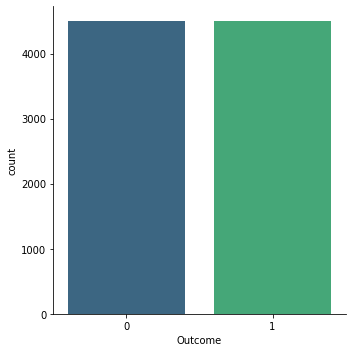

In [ ]:
sns.catplot(x = 'Outcome', kind = 'count', data = df, palette='viridis')

In [ ]:
df['Outcome'].value_counts()

1    4500
0    4500
Name: Outcome, dtype: int64

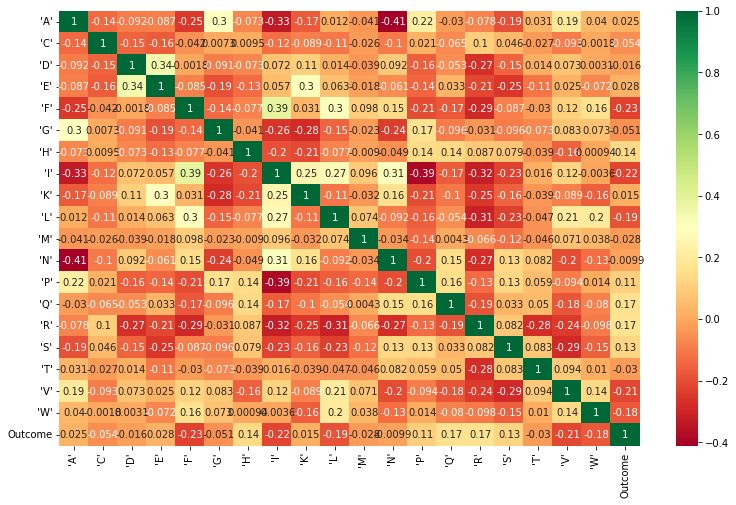

In [ ]:
from pylab import savefig
plt.figure(figsize=(13,8))
svm = sns.heatmap(df.corr(), annot= True, cmap = 'RdYlGn')
figure = svm.get_figure()    
figure.savefig('svm_conf.png', dpi=400)

In [ ]:
X = df.drop(['Outcome', "['#'", " 'Y']"], axis = 1)
y = df['Outcome']

In [ ]:
X.keys()

Index([' 'A'', ' 'C'', ' 'D'', ' 'E'', ' 'F'', ' 'G'', ' 'H'', ' 'I'', ' 'K'',
       ' 'L'', ' 'M'', ' 'N'', ' 'P'', ' 'Q'', ' 'R'', ' 'S'', ' 'T'', ' 'V'',
       ' 'W''],
      dtype='object')

#Train set val set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2)

In [ ]:
import tensorflow as tf
from keras.layers import Dense, Dropout
from keras.models import Sequential
from tensorflow import keras
# from keras.optimizers import Adam
from tensorflow.keras.optimizers import Adam

In [ ]:
def build_model():
    model = Sequential()

    # Input Layer
    model.add(Dense(units = 64, activation = 'relu', input_shape = [len(X.keys())]))
    model.add(Dropout(0.2))

    # Hidden Layer - I
    model.add(Dense(units = 128, activation= 'relu'))
    model.add(Dropout(0.2))

    # Hidden Layer - II
    model.add(Dense(units = 128, activation= 'relu'))
    model.add(Dropout(0.2))

    # Output Layer
    model.add(Dense(units = 1, activation='sigmoid'))
  
    # Optimizers 
    # Learning rate 'alpha' = (0.00001 - 0.1) 
    optimizers = Adam(learning_rate= 0.001)

    # Multiclass - categorical_crossentropy
    model.compile(loss = 'binary_crossentropy', optimizer = optimizers, metrics = ['accuracy'])
    
    return model

In [ ]:
model = build_model()

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1280      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 1

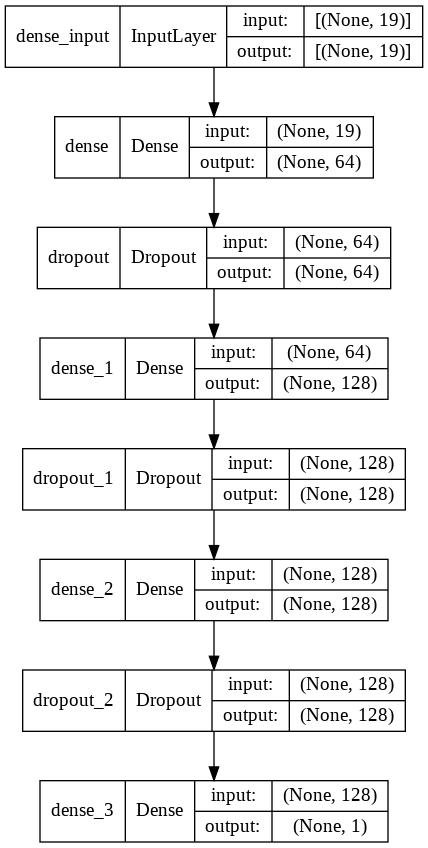

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model,to_file='model.png',show_shapes=True,show_layer_names=True)

In [ ]:
history = model.fit(X_train, y_train, epochs = 500, batch_size= 25, validation_split = 0.2)

Epoch 1/500
202/202 [==============================] - 2s 4ms/step - loss: 0.6563 - accuracy: 0.5972 - val_loss: 0.5919 - val_accuracy: 0.6802
Epoch 2/500
202/202 [==============================] - 1s 3ms/step - loss: 0.5989 - accuracy: 0.6625 - val_loss: 0.5770 - val_accuracy: 0.6857
Epoch 3/500
202/202 [==============================] - 0s 2ms/step - loss: 0.5852 - accuracy: 0.6752 - val_loss: 0.5694 - val_accuracy: 0.6929
Epoch 4/500
202/202 [==============================] - 0s 2ms/step - loss: 0.5757 - accuracy: 0.6847 - val_loss: 0.5840 - val_accuracy: 0.6802
Epoch 5/500
202/202 [==============================] - 1s 3ms/step - loss: 0.5666 - accuracy: 0.6915 - val_loss: 0.5563 - val_accuracy: 0.7087
Epoch 6/500
202/202 [==============================] - 1s 3ms/step - loss: 0.5618 - accuracy: 0.6984 - val_loss: 0.5657 - val_accuracy: 0.6929
Epoch 7/500
202/202 [==============================] - 1s 3ms/step - loss: 0.5534 - accuracy: 0.6950 - val_loss: 0.5507 - val_accuracy: 0.7032

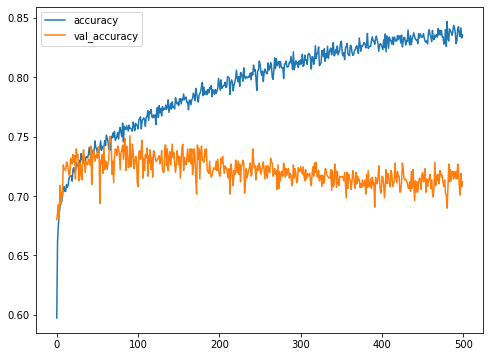

In [ ]:
pd.DataFrame(history.history)[['accuracy', 'val_accuracy']].plot(figsize = (8,6))

In [ ]:
model.evaluate(X_test, y_test)

85/85 [==============================] - 0s 1ms/step - loss: 0.7522 - accuracy: 0.7163


[0.7521896958351135, 0.7162963151931763]

In [ ]:
predict = model.predict(X_test)
yhat = np.round(predict)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, yhat)

array([[945, 423],
       [343, 989]])

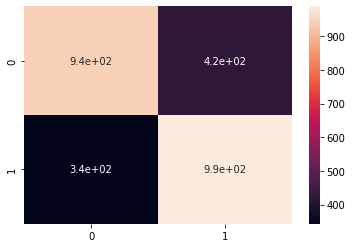

In [ ]:
sns.heatmap(confusion_matrix(y_test, yhat), annot = True)


In [ ]:
acc = accuracy_score(y_test, yhat)
pre = precision_score(y_test, yhat)
rec = recall_score(y_test, yhat)
f1 = f1_score(y_test, yhat)

print("Accuracy =", acc)
print("Precision =",pre)
print("Recall =", rec)
print("f1 =", f1)

Accuracy = 0.7162962962962963
Precision = 0.7004249291784702
Recall = 0.7424924924924925
f1 = 0.7208454810495627


#Test data

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving uniswiss-tst-nega.csv to uniswiss-tst-nega.csv


In [ ]:
nega_df_tst = pd.read_csv(io.BytesIO(uploaded["uniswiss-tst-nega.csv"]))
display(posi_df)

,['#','A','C','D','E','F','G','H','I','K','L','M','N','P','Q','R','S','T','V','W','Y'],Outcome
0,['P08956',0.080342,0.010256,0.072650,0.080342,0.046154,0.048718,0.019658,0.054701,0.061538,0.094872,0.015385,0.045299,0.036752,0.055556,0.071795,0.041026,0.058120,0.065812,0.011111,0.029914529914529916],1
1,['P27235',0.058700,0.004193,0.052411,0.025157,0.046122,0.071279,0.027254,0.058700,0.012579,0.064990,0.018868,0.025157,0.109015,0.025157,0.060797,0.109015,0.125786,0.075472,0.008386,0.020964360587002098],1
2,['P0AD01',0.071130,0.029289,0.071130,0.054393,0.025105,0.037657,0.033473,0.083682,0.050209,0.108787,0.016736,0.037657,0.033473,0.062762,0.054393,0.062762,0.046025,0.054393,0.012552,0.05439330543933055],1
3,['A0A024B7I0',0.073129,0.011905,0.051020,0.062925,0.047619,0.066327,0.013605,0.034014,0.040816,0.107143,0.022109,0.052721,0.069728,0.059524,0.042517,0.100340,0.042517,0.061224,0.015306,0.025510204081632654],1
4,['F4I443',0.070028,0.036415,0.061625,0.071429,0.025210,0.047619,0.030812,0.043417,0.077031,0.088235,0.018207,0.051821,0.053221,0.039216,0.049020,0.100840,0.046218,0.053221,0.012605,0.023809523809523808],1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4495,['B3H469',0.039370,0.000000,0.078740,0.047244,0.086614,0.039370,0.039370,0.086614,0.062992,0.102362,0.039370,0.070866,0.047244,0.015748,0.047244,0.023622,0.070866,0.047244,0.023622,0.031496062992125984],1
4496,['Q3E922',0.025641,0.025641,0.051282,0.096154,0.070513,0.025641,0.025641,0.083333,0.064103,0.076923,0.044872,0.044872,0.044872,0.038462,0.064103,0.051282,0.064103,0.044872,0.025641,0.03205128205128205],1
4497,['D9PTN5',0.050545,0.016848,0.056492,0.053518,0.041625,0.054509,0.017839,0.051536,0.054509,0.076313,0.026759,0.080278,0.072349,0.059465,0.047572,0.077304,0.063429,0.060456,0.004955,0.03369672943508424],1
4498,['Q9VH20',0.050459,0.016055,0.059633,0.086009,0.037844,0.043578,0.033257,0.052752,0.071101,0.115826,0.033257,0.048165,0.037844,0.035550,0.071101,0.060780,0.056193,0.041284,0.016055,0.033256880733944956],1


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving uniswiss-tst-posi.csv to uniswiss-tst-posi.csv


In [ ]:
posi_df_tst = pd.read_csv(io.BytesIO(uploaded["uniswiss-tst-posi.csv"]))
display(posi_df)

,['#','A','C','D','E','F','G','H','I','K','L','M','N','P','Q','R','S','T','V','W','Y'],Outcome
0,['P08956',0.080342,0.010256,0.072650,0.080342,0.046154,0.048718,0.019658,0.054701,0.061538,0.094872,0.015385,0.045299,0.036752,0.055556,0.071795,0.041026,0.058120,0.065812,0.011111,0.029914529914529916],1
1,['P27235',0.058700,0.004193,0.052411,0.025157,0.046122,0.071279,0.027254,0.058700,0.012579,0.064990,0.018868,0.025157,0.109015,0.025157,0.060797,0.109015,0.125786,0.075472,0.008386,0.020964360587002098],1
2,['P0AD01',0.071130,0.029289,0.071130,0.054393,0.025105,0.037657,0.033473,0.083682,0.050209,0.108787,0.016736,0.037657,0.033473,0.062762,0.054393,0.062762,0.046025,0.054393,0.012552,0.05439330543933055],1
3,['A0A024B7I0',0.073129,0.011905,0.051020,0.062925,0.047619,0.066327,0.013605,0.034014,0.040816,0.107143,0.022109,0.052721,0.069728,0.059524,0.042517,0.100340,0.042517,0.061224,0.015306,0.025510204081632654],1
4,['F4I443',0.070028,0.036415,0.061625,0.071429,0.025210,0.047619,0.030812,0.043417,0.077031,0.088235,0.018207,0.051821,0.053221,0.039216,0.049020,0.100840,0.046218,0.053221,0.012605,0.023809523809523808],1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4495,['B3H469',0.039370,0.000000,0.078740,0.047244,0.086614,0.039370,0.039370,0.086614,0.062992,0.102362,0.039370,0.070866,0.047244,0.015748,0.047244,0.023622,0.070866,0.047244,0.023622,0.031496062992125984],1
4496,['Q3E922',0.025641,0.025641,0.051282,0.096154,0.070513,0.025641,0.025641,0.083333,0.064103,0.076923,0.044872,0.044872,0.044872,0.038462,0.064103,0.051282,0.064103,0.044872,0.025641,0.03205128205128205],1
4497,['D9PTN5',0.050545,0.016848,0.056492,0.053518,0.041625,0.054509,0.017839,0.051536,0.054509,0.076313,0.026759,0.080278,0.072349,0.059465,0.047572,0.077304,0.063429,0.060456,0.004955,0.03369672943508424],1
4498,['Q9VH20',0.050459,0.016055,0.059633,0.086009,0.037844,0.043578,0.033257,0.052752,0.071101,0.115826,0.033257,0.048165,0.037844,0.035550,0.071101,0.060780,0.056193,0.041284,0.016055,0.033256880733944956],1


In [ ]:
nega_df_tst['Outcome'] = 0
posi_df_tst['Outcome'] = 1

In [ ]:
frames = [nega_df_tst, posi_df_tst]
df_tst = pd.concat(frames)

In [ ]:
df_tst = df_tst.sample(frac=1)

In [ ]:
df_tst.keys()

Index(['['Protein'', ' 'A'', ' 'C'', ' 'D'', ' 'E'', ' 'F'', ' 'G'', ' 'H'',
       ' 'I'', ' 'K'', ' 'L'', ' 'M'', ' 'N'', ' 'P'', ' 'Q'', ' 'R'', ' 'S'',
       ' 'T'', ' 'V'', ' 'W'', ' 'Y']', 'Outcome'],
      dtype='object')

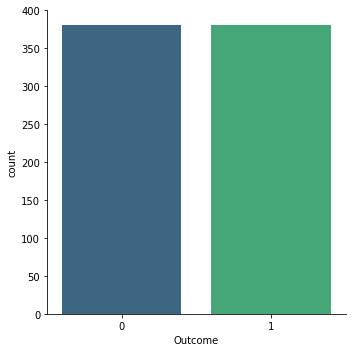

In [ ]:
sns.catplot(x = 'Outcome', kind = 'count', data = df_tst, palette='viridis')

In [ ]:
X_tst = df_tst.drop(['Outcome', "['Protein'", " 'Y']"], axis = 1)
y_tst = df_tst['Outcome']
# X = df.drop(['Outcome', "['#'", " 'Y']"], axis = 1)
# y = df['Outcome']

In [ ]:
model.evaluate(X_tst, y_tst)

24/24 [==============================] - 0s 1ms/step - loss: 0.8358 - accuracy: 0.6798


[0.8358381986618042, 0.6797900199890137]

In [ ]:
predict = model.predict(X_tst)
yhat = np.round(predict)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_tst, yhat)

array([[249, 132],
       [112, 269]])

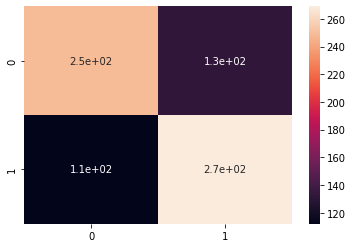

In [ ]:
svm = sns.heatmap(confusion_matrix(y_tst, yhat), annot = True)
figure = svm.get_figure()    
figure.savefig('test_conf.png', dpi=400)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
acc = accuracy_score(y_tst, yhat)
pre = precision_score(y_tst, yhat)
rec = recall_score(y_tst, yhat)
f1 = f1_score(y_tst, yhat)

print("Accuracy =", acc)
print("Precision =",pre)
print("Recall =", rec)
print("f1 =", f1)

Accuracy = 0.6797900262467191
Precision = 0.6708229426433915
Recall = 0.7060367454068242
f1 = 0.6879795396419438


In [ ]:
from sklearn import svm
clf = svm.SVC(kernel='linear')

In [ ]:
clf = clf.fit(X_train, y_train)

In [ ]:
predictions1 = clf.predict(X_test)

In [ ]:

acc = accuracy_score(y_test, predictions1)
pre = precision_score(y_test, predictions1)
rec = recall_score(y_test, predictions1)
f1 = f1_score(y_test, predictions1)

print("Accuracy =", acc)
print("Precision =",pre)
print("Recall =", rec)
print("f1 =", f1)

Accuracy = 0.6803703703703704
Precision = 0.6733185513673319
Recall = 0.683933933933934
f1 = 0.6785847299813781


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


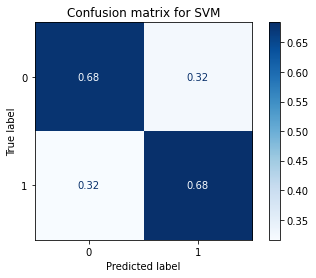

In [ ]:
from sklearn.metrics import plot_confusion_matrix
matrix = plot_confusion_matrix(clf, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
plt.title('Confusion matrix for SVM')
plt.show(matrix)
plt.show()

In [ ]:
predictions2 = clf.predict(X_tst)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


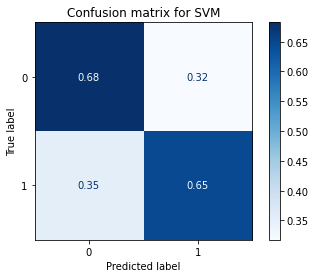

In [ ]:

matrix = plot_confusion_matrix(clf, X_tst, y_tst,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
plt.title('Confusion matrix for SVM')
plt.show(matrix)
plt.show()

In [ ]:
acc = accuracy_score( y_tst, predictions2)
pre = precision_score(y_tst, predictions2)
rec = recall_score(y_tst, predictions2)
f1 = f1_score(y_tst, predictions2)

print("Accuracy =", acc)
print("Precision =",pre)
print("Recall =", rec)
print("f1 =", f1)

Accuracy = 0.6640419947506562
Precision = 0.670299727520436
Recall = 0.6456692913385826
f1 = 0.6577540106951871
